## Parameter Distribution


In [1]:
# Import required libraries
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

# import from prml library
import sys
sys.path.append("/Users/apple/Documents/Courses/Machine Learning Youtube 2020/Codes/")

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

# intialize a random seed for reproduce the results
np.random.seed(1234)

In [3]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    # create equally space points within the domain of the func
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x) # randomly shuffle the points
    # output is some function (func) of input points (x) + random normal noise
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

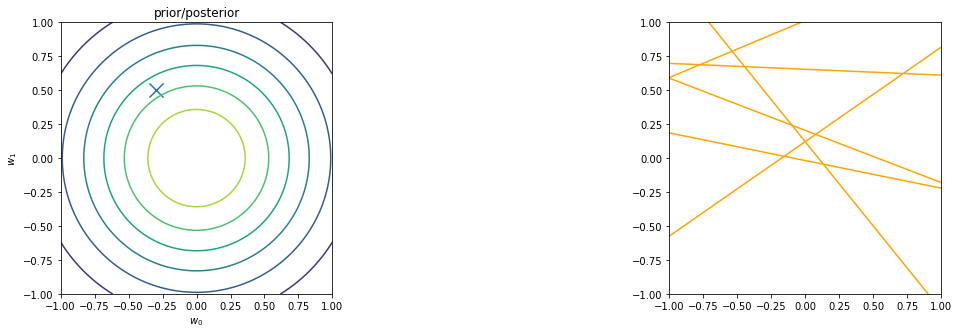

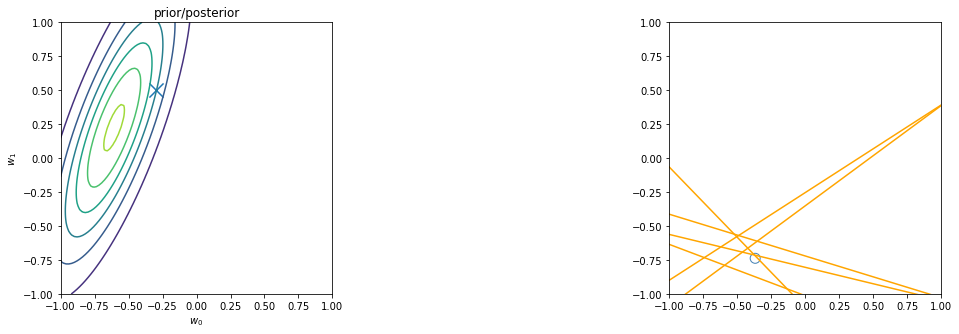

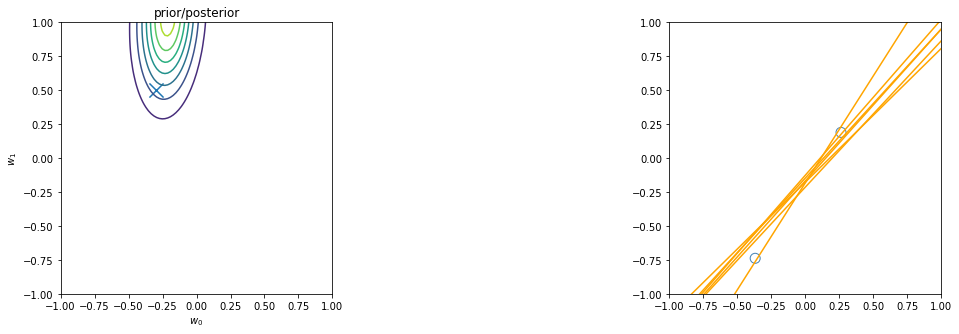

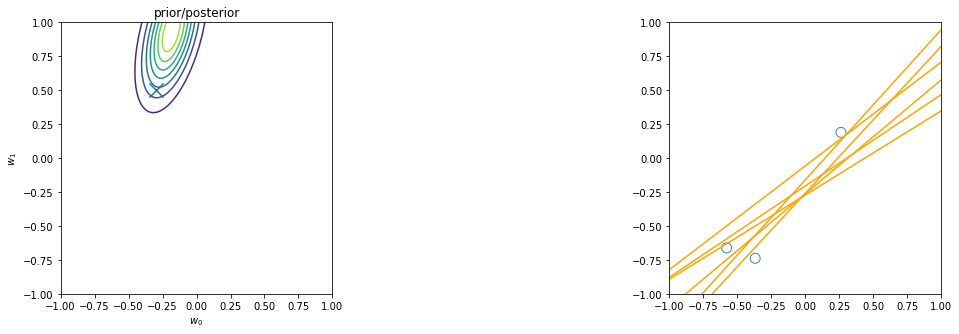

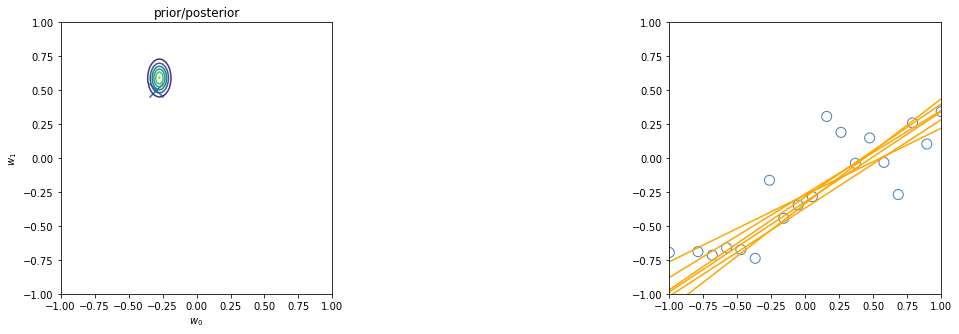

In [11]:
def linear(x):
    return -0.3 + 0.5*x

# create_toy_data(function, number of points, gaussian noise standard deviation, range)
x_train, y_train = create_toy_data(linear, 20, 0.2, [-1,1])

x_test = np.linspace(-1,1,100)

# create a 100x100 grid for plotting the test points in w0-w1 2D space 
w0, w1 = np.meshgrid(
    np.linspace(-1,1,100),
    np.linspace(-1,1,100))

w = np.array([w0, w1]).transpose(1,2,0)

feature = PolynomialFeature(degree = 1) # first order polynomial ax + b

X_train = feature.transform(x_train)
X_test = feature.transform(x_test)
model = BayesianRegression(alpha = 2.0, beta = 25)

for begin, end in [[0,0],[0,1],[1,2],[2,3],[3,20]]:
    model.fit(X_train[begin:end], y_train[begin:end])
    
    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.scatter(-0.3,0.5, s= 200, marker ="x")
    plt.contour(w0, w1, multivariate_normal.pdf(w, mean = model.w_mean, cov = model.w_cov))
    plt.gca().set_aspect('equal')
    plt.xlabel("$w_0$")
    plt.ylabel("$w_1$")
    plt.title("prior/posterior")
    
    plt.subplot(1,2,2)
    plt.scatter(x_train[:end], y_train[:end], s= 100, facecolor ="none", edgecolor = "steelblue", lw=1)
    plt.plot(x_test, model.predict(X_test, sample_size = 6), c ="orange")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.gca().set_aspect('equal', adjustable = 'box')
    plt.show()

In [21]:
w.shape

(100, 100, 2)

In [16]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv

array([[0. , 0.5, 1. ],
       [0. , 0.5, 1. ]])

In [17]:
nx

3

In [18]:
x

array([0. , 0.5, 1. ])

In [19]:
yv

array([[0., 0., 0.],
       [1., 1., 1.]])

In [20]:
y

array([0., 1.])